In [43]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns


In [44]:
data = pd.read_csv('orders.csv')
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,597982.0,محمود آباد,1.0
1,11104039,3063877,248497,2018-02-11 00:29:26.000,980000.0,خرمدره,1.0
2,4228130,3184893,50144,2016-06-14 00:30:08.000,229358.0,قرچک,1.0
3,22225624,6888562,70208,2018-09-03 14:37:19.000,16514.0,قم,1.0
4,4068771,2533490,67627,2016-05-21 11:51:02.000,133028.0,تهران,1.0


In [45]:
data['DayTime_CartFinalize'] = pd.to_datetime(data['DateTime_CartFinalize'], format='%Y-%m-%d')


In [47]:
data = data.loc[(data['DayTime_CartFinalize'] > '2013-12-30')
                     & (data['DayTime_CartFinalize'] < '2014-12-30')]


In [48]:
data.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item,DayTime_CartFinalize
35,1566382,702672,36610,2014-12-09 08:29:35.000,7838889.0,تهران,1.0,2014-12-09 08:29:35
127,1399563,870199,11723,2014-09-09 12:27:57.000,2250000.0,تهران,1.0,2014-09-09 12:27:57
176,1431233,468228,20920,2014-09-28 12:13:28.000,4953704.0,تهران,1.0,2014-09-28 12:13:28
213,1181390,608559,14333,2014-03-31 00:57:35.000,7408519.0,تهران,1.0,2014-03-31 00:57:35
253,1597524,748041,38354,2014-12-24 18:49:25.000,5946296.0,تهران,1.0,2014-12-24 18:49:25


In [49]:
LastDay = max(data['DayTime_CartFinalize'])
LastDay

Timestamp('2014-12-29 23:53:53')

In [50]:
min(data['DayTime_CartFinalize'])

Timestamp('2013-12-30 00:45:00')

In [51]:
data_describe = data.filter(['Amount_Gross_Order', 'Quantity_item'])

In [54]:
data_describe.describe()

,Amount_Gross_Order,Quantity_item
count,4.243000e+03,4243.000000
mean,3.112761e+06,1.074947
std,5.413921e+06,0.622190
min,1.000000e+00,1.000000
25%,2.962960e+05,1.000000
50%,9.074070e+05,1.000000
75%,3.276482e+06,1.000000
max,6.000000e+07,30.000000


In [55]:
data_describe.corr()

,Amount_Gross_Order,Quantity_item
Amount_Gross_Order,1.000000,-0.020259
Quantity_item,-0.020259,1.000000


In [58]:
Recency = data.groupby('ID_Customer')['DayTime_CartFinalize'].apply( lambda x: (LastDay - x.max()).days)
Recency = Recency.reset_index()
Recency.head()

,ID_Customer,DayTime_CartFinalize
0,466132,364
1,466163,286
2,466204,40
3,466276,354
4,466410,10


In [59]:
Frequency = data.groupby('ID_Customer')['ID_Order'].count()
Frequency = Frequency.reset_index()
Frequency.head()

,ID_Customer,ID_Order
0,466132,1
1,466163,1
2,466204,1
3,466276,1
4,466410,1


In [60]:
RFM1 = pd.merge(Recency, Frequency, on='ID_Customer', how = 'inner' )
RFM1.head()

,ID_Customer,DayTime_CartFinalize,ID_Order
0,466132,364,1
1,466163,286,1
2,466204,40,1
3,466276,354,1
4,466410,10,1


In [61]:
Monetary = data.groupby('ID_Customer')['Amount_Gross_Order'].sum()
Monetary = Monetary.reset_index()
Monetary.head()

,ID_Customer,Amount_Gross_Order
0,466132,3869057.0
1,466163,61321.0
2,466204,3282963.0
3,466276,12296604.0
4,466410,6604444.0


In [62]:
RFM = pd.merge(RFM1, Monetary, on='ID_Customer', how = 'inner' )
RFM.head()

,ID_Customer,DayTime_CartFinalize,ID_Order,Amount_Gross_Order
0,466132,364,1,3869057.0
1,466163,286,1,61321.0
2,466204,40,1,3282963.0
3,466276,354,1,12296604.0
4,466410,10,1,6604444.0


In [63]:
RFM.columns = ['ID_Customer','Recency', 'Frequency', 'Monetary']
RFM.head()

,ID_Customer,Recency,Frequency,Monetary
0,466132,364,1,3869057.0
1,466163,286,1,61321.0
2,466204,40,1,3282963.0
3,466276,354,1,12296604.0
4,466410,10,1,6604444.0


In [64]:
rfm_df = RFM[['Recency', 'Frequency', 'Monetary']]

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,10))
rfm_N = scaler.fit_transform(rfm_df)

In [66]:
rfm_N

array([[10.        ,  1.        ,  1.58035841],
       [ 8.07142857,  1.        ,  1.009198  ],
       [ 1.98901099,  1.        ,  1.49244431],
       ...,
       [ 1.        ,  1.        ,  1.0850554 ],
       [ 1.        ,  1.        ,  1.09755535],
       [ 1.        ,  1.        ,  1.0409998 ]])

In [67]:
rfm_df_scaled = pd.DataFrame(rfm_N)
rfm_df_scaled.columns = ['Recency', 'Frequency', 'Monetary']
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,10.000000,1.0,1.580358
1,8.071429,1.0,1.009198
2,1.989011,1.0,1.492444
3,9.752747,1.0,2.844490
4,1.247253,1.0,1.990666


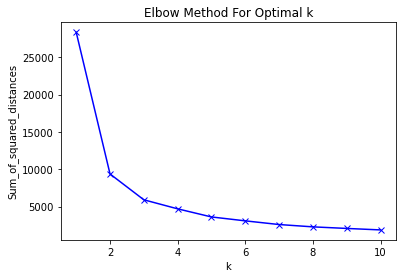

In [68]:
Sum_of_squared_distances = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(rfm_df_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [70]:
km = KMeans(n_clusters= 6 ,init='k-means++', max_iter=300 )
km = km.fit(rfm_df_scaled)
km

KMeans(n_clusters=6)

In [71]:
km.labels_

array([0, 0, 5, ..., 5, 5, 5])

In [72]:
RFM['Cluster_Id'] = km.labels_
RFM.head()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
0,466132,364,1,3869057.0,0
1,466163,286,1,61321.0,0
2,466204,40,1,3282963.0,5
3,466276,354,1,12296604.0,0
4,466410,10,1,6604444.0,5


<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

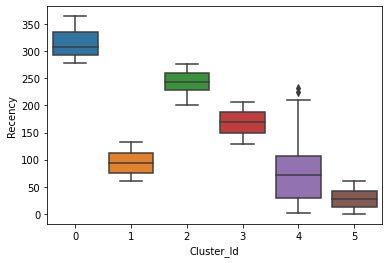

In [73]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

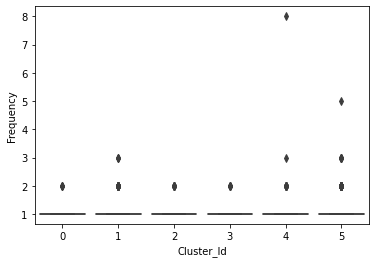

In [74]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)


<AxesSubplot:xlabel='Cluster_Id', ylabel='Monetary'>

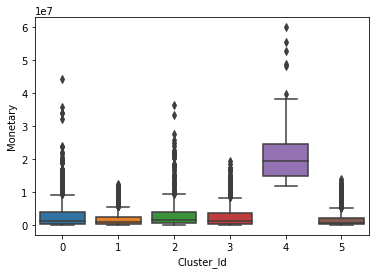

In [75]:
sns.boxplot(x='Cluster_Id', y='Monetary', data=RFM)


In [83]:
RFM.shape

(4107, 5)

In [84]:
RFM[RFM['Cluster_Id'] == 0].shape

(512, 5)

In [86]:
RFM[RFM['Cluster_Id'] == 1].shape

(983, 5)

In [87]:
RFM[RFM['Cluster_Id'] == 2].shape

(542, 5)

In [88]:
RFM[RFM['Cluster_Id'] == 3].shape

(750, 5)

In [89]:
RFM[RFM['Cluster_Id'] == 4].shape

(163, 5)

In [90]:
RFM[RFM['Cluster_Id'] == 5].shape

(1157, 5)

In [91]:
RFM.describe()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
count,4.107000e+03,4107.000000,4107.000000,4.107000e+03,4107.000000
mean,8.437696e+05,135.140248,1.033114,3.215838e+06,2.618456
std,2.452104e+05,100.170847,0.223714,5.510646e+06,1.798083
min,4.661320e+05,0.000000,1.000000,1.000000e+00,0.000000
25%,6.179135e+05,47.000000,1.000000,3.157410e+05,1.000000
50%,8.299060e+05,115.000000,1.000000,9.444440e+05,3.000000
75%,1.045231e+06,210.000000,1.000000,3.470685e+06,5.000000
max,1.335078e+06,364.000000,8.000000,6.000000e+07,5.000000


In [92]:
RFM.corr()

,ID_Customer,Recency,Frequency,Monetary,Cluster_Id
ID_Customer,1.000000,-0.297390,-0.044167,0.010259,0.208316
Recency,-0.297390,1.000000,-0.090009,0.053359,-0.693454
Frequency,-0.044167,-0.090009,1.000000,0.067065,0.075009
Monetary,0.010259,0.053359,0.067065,1.000000,0.038718
Cluster_Id,0.208316,-0.693454,0.075009,0.038718,1.000000


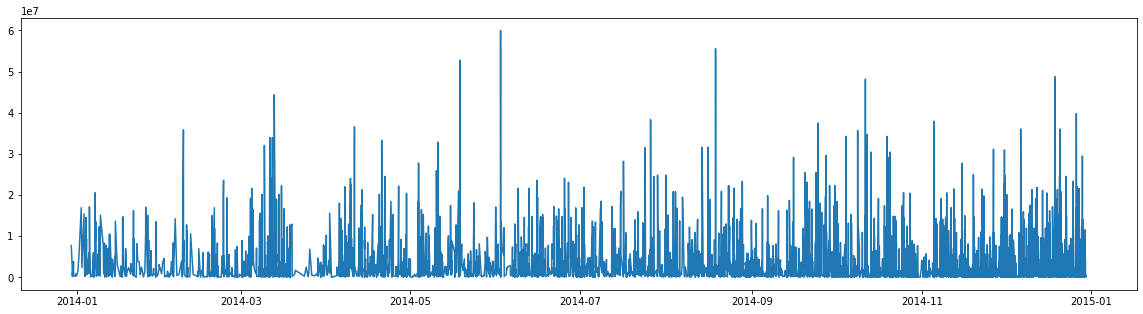

In [76]:
df_average_sales = data.groupby(by=['DayTime_CartFinalize'], as_index=False)['Amount_Gross_Order'].sum()
df_average_saless = df_average_sales.sort_values('Amount_Gross_Order', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.DayTime_CartFinalize, df_average_sales.Amount_Gross_Order)
plt.show()

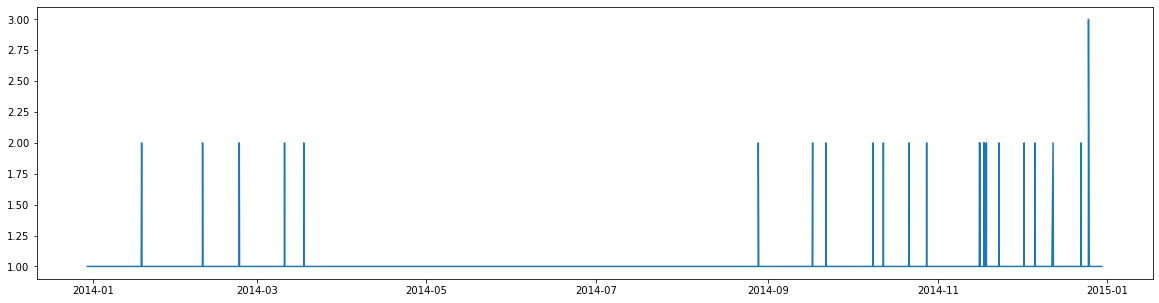

In [77]:
df_average_sales = data.groupby(by=['DayTime_CartFinalize'], as_index=False)['ID_Order'].count()
df_average_saless = df_average_sales.sort_values('ID_Order', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.DayTime_CartFinalize, df_average_sales.ID_Order)
plt.show()

In [78]:
orders = data.filter(['city_name_fa', 'Quantity_item'])

In [79]:
groups = orders.groupby(by=['city_name_fa'], as_index=False)
groups.first()

,city_name_fa,Quantity_item
0,آب بر,1.0
1,آبادان,1.0
2,آباده,1.0
3,آبدانان,1.0
4,آبپخش,1.0
...,...,...
323,گناباد,1.0
324,گنبدکاووس,1.0
325,گیلانغرب,1.0
326,یاسوج,1.0


In [80]:
orders = groups.sum()
orders.head()

,city_name_fa,Quantity_item
0,آب بر,2.0
1,آبادان,25.0
2,آباده,1.0
3,آبدانان,3.0
4,آبپخش,2.0


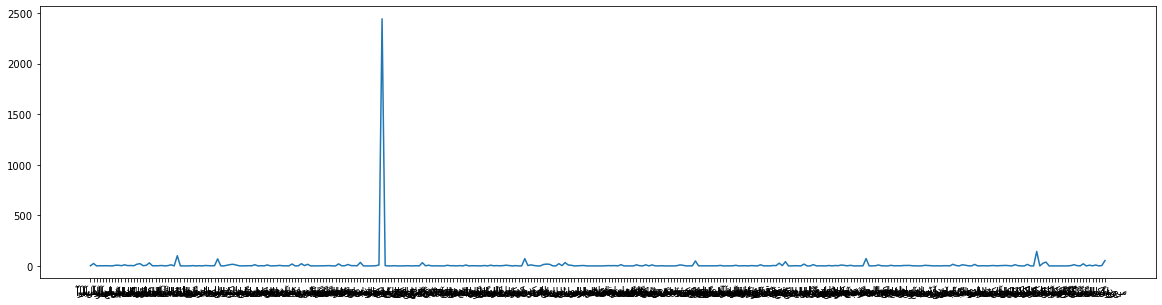

In [81]:
df_average_sales = orders.groupby(by=['city_name_fa'], as_index=False)['Quantity_item'].sum()
df_average_saless = df_average_sales.sort_values('Quantity_item', ascending=False)

plt.figure(figsize=(20,5))
plt.plot(df_average_sales.city_name_fa, df_average_sales.Quantity_item)
plt.show()

In [82]:
orders[orders['Quantity_item'] == orders['Quantity_item'].max()]


,city_name_fa,Quantity_item
94,تهران,2444.0
